# Graia MNIST digits example

In [1]:
# %pip install numpy
# %pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

# to get the MNIST digits
# %pip install tensorflow
import tensorflow as tf
import tensorflow.keras

2024-04-23 17:45:19.812461: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-23 17:45:19.812635: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-23 17:45:19.814676: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-23 17:45:19.843171: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-23 17:45:20.367185: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
# Graia
# %pip install pyopencl
# %pip install pocl-binary-distribution
# %pip install futhark-ffi
from graia import Graia

🌄 Graia v0.0.1


In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# print(train_labels[0])
# plt.imshow(train_images[0])

In [4]:
N = 24000
train_images = train_images[:N]
train_labels = train_labels[:N]
train_images = train_images.reshape(N, 28*28)

In [5]:
model = Graia(inputs=28*28, layer_nodes=128, layers=3, outputs=10, boost=2, seed=37)
# plt.imshow(model.hidden_weights[0])
# print(model.hidden_weights[0])

🌄 Graia model with 134,400 parameters ready.


In [6]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5: accuracy 10.525%
Epoch 2/5: accuracy 9.912%
Epoch 3/5: accuracy 9.917%
Epoch 4/5: accuracy 9.925%
Epoch 5/5: accuracy 9.921%


In [7]:
print("\n", model.input_weights[:2], "...")
print("\n", model.hidden_weights[0])
print("\n", model.output_weights[:2], "...")



 [[ 8  7  7 ... -7  7  7]
 [-4 -6  7 ... -4 -4  7]] ...

 [[-8  5  5 ...  7  5 -6]
 [ 5  5  5 ...  6 -5 -5]
 [-6  6 -5 ...  5 -7  5]
 ...
 [ 7  7  7 ... -4 -6  7]
 [-4  8 -3 ...  7  7 -3]
 [ 7  7  7 ...  7  7  7]]

 [[ 5  5  6 -8  5 -7  5  5  5  5  6  5  5  7  5  5  7  7  5  5  5  5  5  5
  -6  5  5  6  5  5  5  6 -5  5  5  5 -7  5  5 -6  6 -8 -8 -7  5  5 -6 -7
   5  5 -6  6  5  5  5  5  5  5  7  6 -8 -6 -8  5  5  7  5  7  7 -8 -8  5
   6  7  5  5  7 -7  5 -6 -6 -7 -7  5  5  5  5  5  7 -6  5 -5  5  5  5  5
   6 -5  5  5  5 -8 -6 -5  7  6  6  7  6  5 -8  5  6 -6  5 -6 -7 -8  7  5
   5 -7  5 -8  5 -7 -6 -8]
 [ 5  5  5  5  5  6  5  5  5  5  5  5  5 -6  6  5 -4  5 -4 -4  7 -5 -5  5
   6 -6  6 -4  5  6  6  5  5 -5 -6 -4  6  5  5  5  5 -8  5  5 -4  5 -6  6
   5  5  5 -6  5  5 -4  5  5 -7  5 -5  6 -6 -7  6  6 -5  6 -6  6  5  5  5
   5  5 -5  5 -4 -4  5  5 -7  5  5 -5  5  5  5  7 -5 -4  6  5  6  5  5  5
   5 -5 -7 -6  7 -7  5 -8 -4 -8  5  5 -6  6  5 -6  5  5  5 -8  5  7 -4  6
   5  5 -5  5  6


 [ 70 255   0 234   0   0   0   0   0   0   4 255   0   0   0   0  34   0
   0   0 124   0  56   0 130   0   0   0   0   0   0   0   0   0   0 152
   0   0   0   0   0   0   0  76   0   0   0 164   0 228 104   0   0   0
   0   0   0 168   8 132   0 218   0   0   0   0   0   0   0 255 255   0
   0   0  40   0   0 116   0   0   0   0   0   0   0   0 152   0   0   0
   0  18   0   0   0  84 255   0  32   0   0   0  10   0   0   0   0   0
   0   0   0 255   0 102   0   0 136   0 146   0   0 102   0   0 138   0
 255   0]

 [ 0  0  0  0  6  0  0  0  0  4  0  0  0  0  0  0  0 60  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 10  0  0  0  0 10  0  0  0  0  0  0  0 46  0  0
  0  0  0 58  0  0  0 26  0  0  0  0  0 26 38 62  0  0 22  0 16  2  0 44
  0  0  0  0  0 10  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0 28
  0  0  0  0  0  0 10  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  2  0 22  6 28  6 56]

 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 

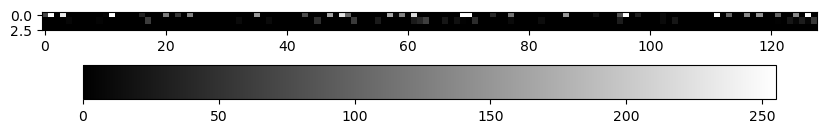


 [0 0 0 0 0 0 0 0 0 0]


In [8]:
plt.figure(figsize = (10,3))
plt.imshow(model.last_intermediate_outputs, cmap="grey")
plt.colorbar(orientation="horizontal")
print("\n", model.last_intermediate_outputs[0])
print("\n", model.last_intermediate_outputs[1])
print("\n", model.last_intermediate_outputs[2])
plt.show()
print("\n", model.last_outputs)